In [1]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/ML Project-1/House Price India.csv"

df = pd.read_csv(file_path)

df.head()


Mounted at /content/drive


,Number Of Bedrooms,Number Of Bathrooms,Living Area,Lot Area,Number Of Floors,Condition Of The House,Grade Of The House,Area Of The House(Excluding Basement),Area Of The Basement,Built Year,Renovation Year,Lattitude,Longitude,Living Area Renov,Lot Area Renov,Number Of Schools Nearby,Distance From The Airport,Price
0,5,2.50,3650,9050,2.0,5,10,3370,280,1921,0,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500,1,51,805000


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [4]:
# Step 1: Separate features and target variable
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

# Step 2: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Print results
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): ₹104,115.20
R² Score: 0.6868


In [5]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "max_depth": [5, 10, 15, None],  # Try limiting tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 5]  # Minimum samples in a leaf node
}

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_dt_model = grid_search.best_estimator_
best_dt_params = grid_search.best_params_

# Make predictions using the best model
y_pred_dt_best = best_dt_model.predict(X_test)

# Evaluate the best model
mae_dt_best = mean_absolute_error(y_test, y_pred_dt_best)
r2_dt_best = r2_score(y_test, y_pred_dt_best)

# Print results
print(f"Best Decision Tree Parameters: {best_dt_params}")
print(f"Optimized Mean Absolute Error (MAE): ₹{mae_dt_best:,.2f}")
print(f"Optimized R² Score: {r2_dt_best:.4f}")


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Optimized Mean Absolute Error (MAE): ₹94,061.61
Optimized R² Score: 0.7525


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller hyperparameter grid
param_dist_rf = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Initialize Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Use Randomized Search (faster than GridSearchCV)
random_search_rf = RandomizedSearchCV(
    rf_model, param_dist_rf,
    n_iter=5,  # Try only 5 random combinations
    cv=3,  # 3-fold CV instead of 5 (reduces computation)
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1,  # Monitor progress
    random_state=42
)

# Train the model with Randomized Search
random_search_rf.fit(X_train, y_train)

# Get best model and parameters
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Make predictions
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate performance
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Print results
print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Optimized Random Forest MAE: ₹{mae_rf_best:,.2f}")
print(f"Optimized Random Forest R² Score: {r2_rf_best:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Optimized Random Forest MAE: ₹73,271.26
Optimized Random Forest R² Score: 0.8463


<ipython-input-7-957c9a8b1868>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"], palette="viridis")


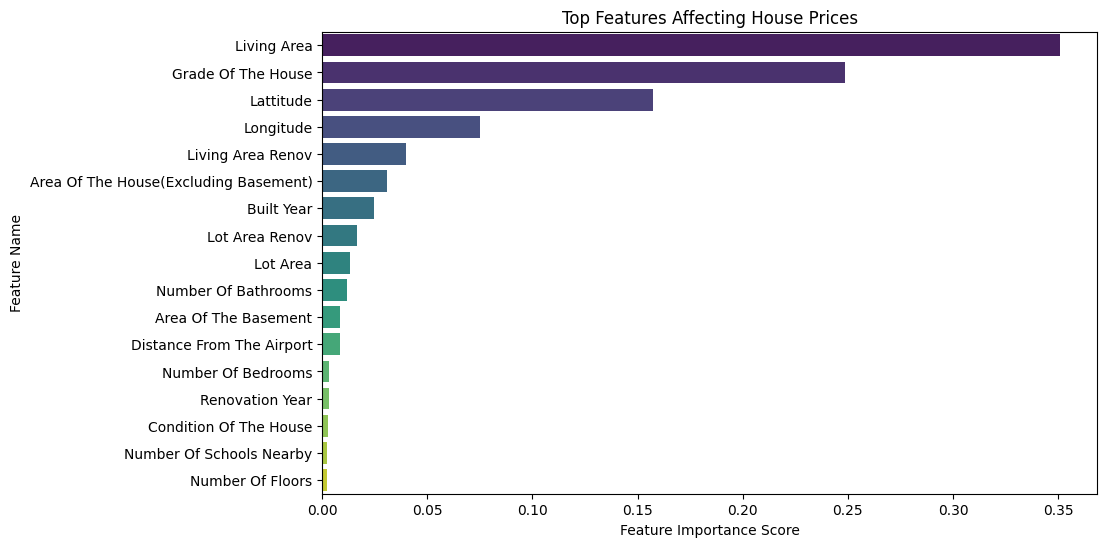

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feat_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top Features Affecting House Prices")
plt.show()


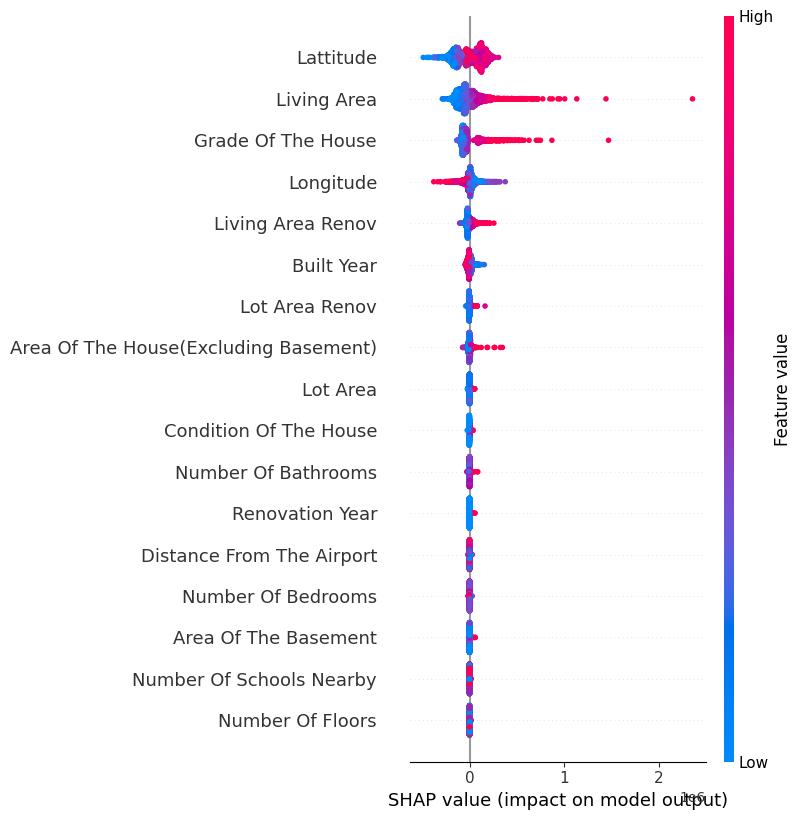

In [13]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(best_rf_model)

# Compute SHAP values with additivity check disabled
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test)
